<a href="https://colab.research.google.com/github/ShanmugapriyanManoharan/OpenCV-Projects/blob/master/OpenCV_Basics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

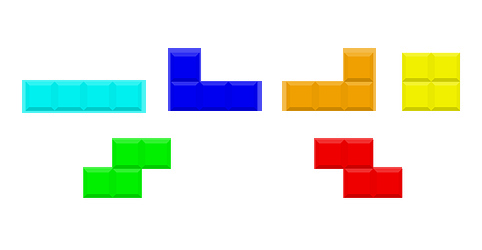

In [2]:
image = cv2.imread("tetris_blocks.png")
cv2_imshow(image)

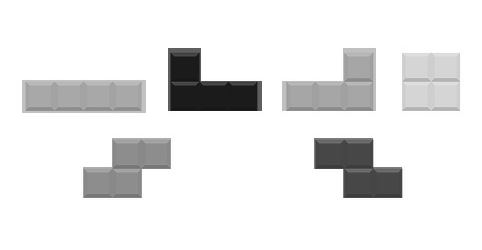

In [3]:
# Grayscale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

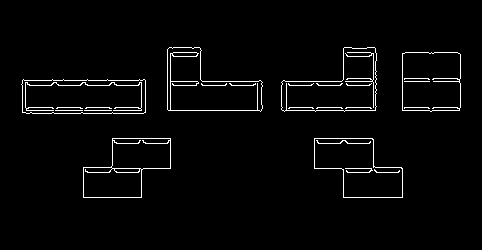

In [4]:
# Applying Canny edge detection
edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)

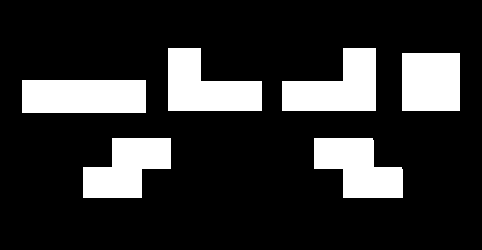

In [5]:
# threshold = 225
# threshold < 225 (white; foreground)
# threshold >= 225 (black; background)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

In [0]:
# Finding contours (i.e., outlines) of the foreground objects in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

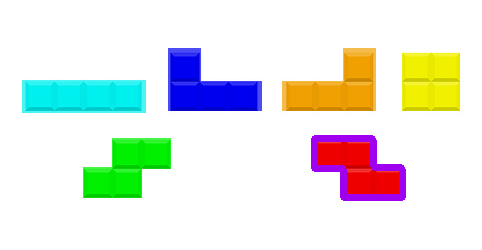

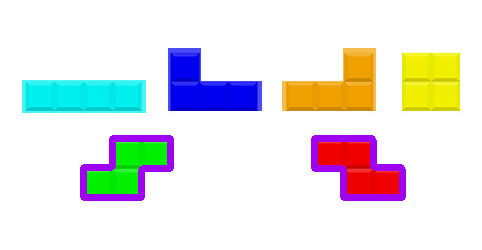

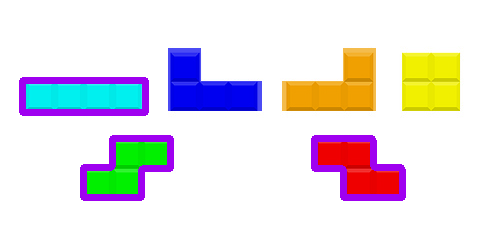

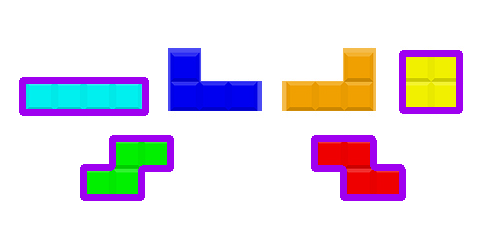

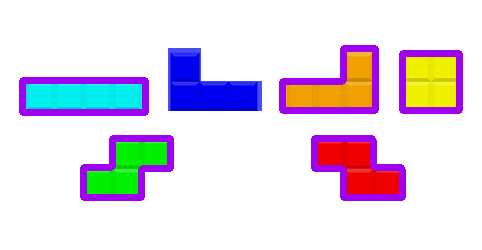

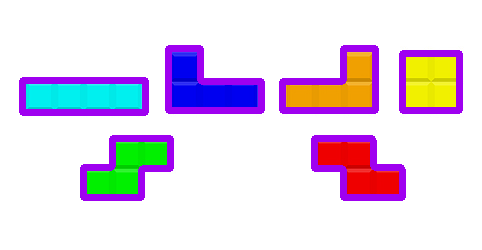

In [7]:
for c in cnts:
	# draw each contour on the output image with a 5px thick purple outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 5)
	cv2_imshow(output)

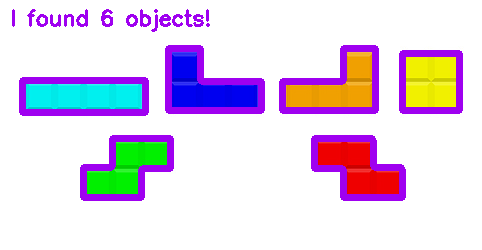

In [8]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)

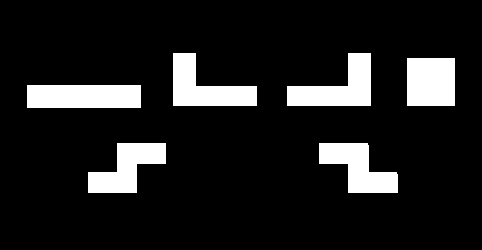

In [9]:
# Applying Erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)

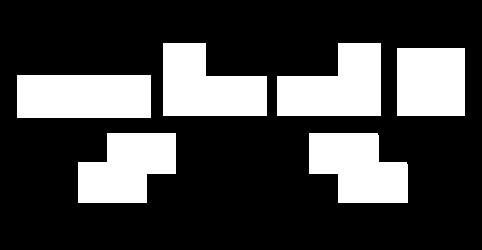

In [10]:
# Applying dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)

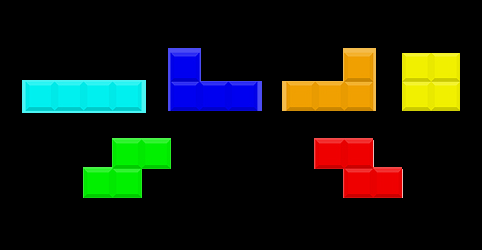

In [11]:
# Applying a bitwise AND to our input image, to keep the masked regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)